In [219]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_df = pd.read_csv("./data/city_data.csv")
ride_data_df = pd.read_csv("./data/ride_data.csv")

# Read the City and Ride Data
city_data_df.head()
ride_data_df.head()

# Combine the data into a single dataset
merge_data = pd.merge(city_data_df, ride_data_df, on="city", how="outer")

# Display the data table for preview
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [220]:
# City Type
urban_city = merge_data.loc[merge_data["type"] == "Urban", :]
suburban_city = merge_data.loc[merge_data["type"] == "Suburban", :]
rural_city = merge_data.loc[merge_data["type"] == "Rural", :]
cities = city_data_df.set_index("city")["type"]

In [221]:
# Rides Per City

urban_rides = urban_city.groupby(["city"])['ride_id'].count()
suburban_rides = suburban_city.groupby(["city"])['ride_id'].count()
rural_rides = rural_city.groupby(["city"])['ride_id'].count()
total_rides = merge_data.groupby(['city'])['ride_id'].count()
total_rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [222]:
# Average Fare per City

urban_fare = round(urban_city['fare'].mean(),2)
suburban_fare = round(suburban_city['fare'].mean(), 2)
rural_fare = round(rural_city['fare'].mean(), 2)
avg_fare = round(merge_data.groupby(["city"])['fare'].mean(), 2)
avg_fare.head()

city
Amandaburgh      24.64
Barajasview      25.33
Barronchester    36.42
Bethanyland      32.96
Bradshawfurt     40.06
Name: fare, dtype: float64

In [224]:
# Driver Count per City
urban_drivers = urban_city.groupby('type')['driver_count'].mean()
suburban_drivers = suburban_city.groupby('type')['driver_count'].mean()
rural_drivers = rural_city.groupby('type')['driver_count'].mean()
total_drivers = merge_data.groupby("city")['driver_count'].mean()
total_drivers.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [225]:
# Data frame for scatter plot
graph_df = pd.DataFrame({"Rides": total_rides,
                           "Avg. Fare": avg_fare,
                           "Drivers": total_drivers,
                           "City Type": cities})

# divide city data by type
urban_df = graph_df.loc[graph_df["City Type"]== "Urban"]
suburban_df = graph_df.loc[graph_df["City Type"]== "Suburban"]
rural_df = graph_df.loc[graph_df["City Type"]== "Rural"]

graph_df.head()

,Rides,Avg. Fare,Drivers,City Type
Amandaburgh,18,24.64,12,Urban
Barajasview,22,25.33,26,Urban
Barronchester,16,36.42,11,Suburban
Bethanyland,18,32.96,22,Suburban
Bradshawfurt,10,40.06,7,Rural


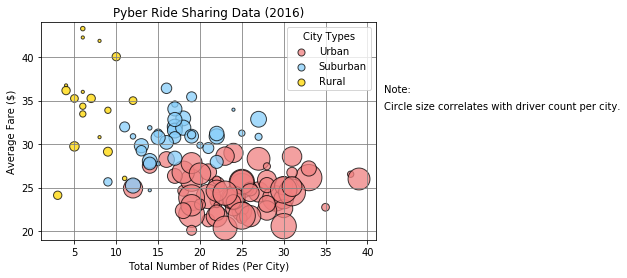

In [217]:
# Build the scatter plots for each city types
plt.scatter(urban_df['Rides'], urban_df['Avg. Fare'], facecolor = "lightcoral", edgecolors="black", s = urban_df["Drivers"]*10, label = "Urban", alpha = 0.75, linewidth = 1)
plt.scatter(suburban_df['Rides'], suburban_df['Avg. Fare'], color = "lightskyblue", edgecolors ="black", s = suburban_df["Drivers"]*10, label = "Suburban", alpha = .75, linewidth = 1)
plt.scatter(rural_df['Rides'], rural_df['Avg. Fare'], color = "gold", edgecolors = "black", s = rural_df["Drivers"]*10, label = "Rural", alpha = .75, linewidth = 1)

# Incorporate the other graph properties
plt.ylim(19,44)
plt.xlim(1,41)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")

# Create a legend
legend_style = plt.legend(title="City Types", fancybox=True)
legend_style.legendHandles[0]._sizes = [50]
legend_style.legendHandles[1]._sizes = [50]
legend_style.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42,36,"Note:")
plt.text(42,34,"Circle size correlates with driver count per city.")

# Save Figure

plt.show()

## Total Fares by City Type

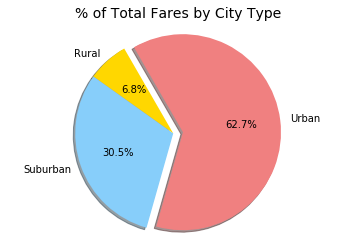

In [226]:
# Calculate Type Percents
fares_by_city_type = pd.DataFrame(merge_data.groupby("type")["fare"].sum())
#fares_by_city_type.head()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(fares_by_city_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type",{'fontsize':14})
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("./TotalFaresByCity.png")
plt.show()

## Total Rides by City Type

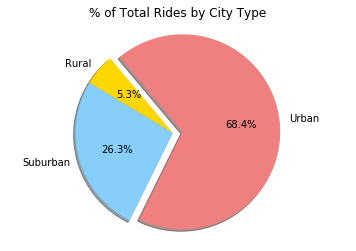

In [213]:
# Calculate Ride Percents
total_rides_df = pd.DataFrame(merge_data.groupby('type')["ride_id"].count())
#total_rides_df.head()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
city_types = ["Rural","Suburban", "Urban"]
plt.pie(total_rides_df, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("./TotalRidesByCity.png")
plt.show()

## Total Drivers by City Type

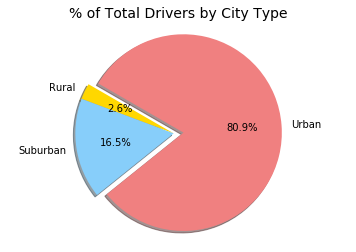

In [216]:
# Calculate Driver Percents
total_drivers = pd.DataFrame(city_data_df.groupby("type")["driver_count"].sum())
#total_drivers.head()

# Build Pie Chart
city_types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0,0,0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type",{'fontsize':14})
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("./TotalDriversByCity.png")
plt.show()